/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: Mean of empty slice


0

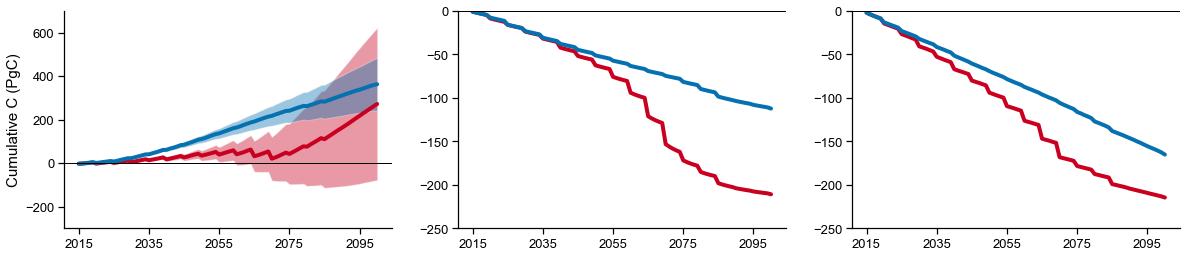

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import os
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-ticks')
sns.set_context("notebook", font_scale=1.5, \
                rc={"lines.linewidth": 2.5, "lines.markersize": 6.0, 'lines.markeredgewidth': 1.0})

### various sizes
label_size=15
title_size=18
tick_size =13
legend_size=12
alpha=.4
alpha_face=0.5
alpha_face1=0.5
linewidth = 3
rotation  = 270 # or 50 or 270
bar_width=1.0
border_size=0.1
line_width=4.0

linstylessp2 = "-"
linstylessp1="-"

frac_ccs_ssp1 = .3
frac_ccs_ssp2 = .6

### carbon fossil fuel offsets
efffossil_low = 0.33
efffossil_high = 0.6
effbio_low = .26
effbio_high = .55

eff_diff_low = .6 ### this is the ratio that efffossil/effbio
eff_diff_high = 2.3 

ratio_offset_low = 0.5
ratio_offset_high = 2.0

lowconvertion = .3 ### this is the ratio that effbio/efffossil*ratio_offset
highconvertion = 2.4

### BECCS
effccs_low = 0.26
effccs_high = 0.95

frac_ccs_ssp1 = .3
frac_ccs_ssp2 = .6

lowccs_ssp1 = effccs_low*frac_ccs_ssp1  # use this for calculation
highccs_ssp1 = effccs_high *frac_ccs_ssp1

lowccs_ssp2 = effccs_low*frac_ccs_ssp2
highccs_ssp2 = effccs_high *frac_ccs_ssp2

orange = "#ca0020"
green = "#0571b0"
purple = "purple"

rcps=["SSP226Lu-BIOCROP",\
     "SSP126Lu-REFOREST"]
colors=[orange,green,purple]
color_dic={ivar: ivar_array for (ivar, ivar_array) in zip(rcps,colors)}

data_dir="../data/"

def set_labels(ax,var,xindex,recs,lowerlimit,upperlimit,ylabel):
    ax.tick_params(axis='both', which='major', labelsize=tick_size,color="k")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yearb="2015"
    yeare="2105"
    year_start_string=str(yearb)
    year_end_string=str(yeare)
    daterange = pd.period_range(year_start_string,year_end_string, freq="1Y")
    daterange = [d.strftime('%Y') for d in daterange]
    daterange=np.array(daterange)

    interval=20
    ax.set_xticks(xindex[::interval])
    ax.set_xticklabels(daterange[::interval],fontsize=tick_size,color="k")
    if (setylim):
        ax.set_ylim(lowerlimit,upperlimit)
    ax.axhline(y=0.0,c="k",linewidth=1.0)
    labelcolor="k"
    ax.spines['bottom'].set_color(labelcolor)
    ax.spines['left'].set_color(labelcolor)
    ax.xaxis.label.set_color(labelcolor)
    ax.tick_params(axis='x', colors=labelcolor)
    ax.yaxis.label.set_color(labelcolor)
    ax.tick_params(axis='y', colors=labelcolor)

def read_cesm_data(rcp,var):
    ensbase=np.empty((ens_size,86))
        
    for caseid,i in zip(["ensemble1","ensemble2","ensemble3"],np.arange(ens_size)):
        file=data_dir+var+"_"+rcp+"_"+caseid+"_2015_2100_PgC.txt"
        alldata=np.loadtxt(file)
        clmdata_date=read_clmdata_full(alldata)
        clmdata_date['SMA_10'] = clmdata_date.sim.rolling(rolling_year, min_periods=1).mean()
        clmdata_date[clmdata_date['SMA_10']==1e36]=np.nan
        ssp1_case1 = clmdata_date['SMA_10']
        dateindex=clmdata_date.index
        ensbase[i,:] = ssp1_case1
        
    data = np.nanmean(ensbase,axis=0)
    return data,dateindex

ens_size=3

def subplot_Cnet(ax,lowerlimit,upperlimit,ylabel,var):
    recs=np.zeros(0)
    xindex=np.zeros(0)
    gcam="miroc"
    crops=["corn","soy","forest","shrub","grass","bioenergy"]
    color=["k","y","g","b","pink","r"]
    colors=["#1B9E77","#D95F02","#E7298A","#386CB0"]
    colors=[orange,green,  purple,"k","pink","blue","green"]
    linestyles=["-","-","-",'-',"--","--","--"]

    ### bioenergy
    diffs = np.zeros(0)
    for rcp,color in zip(rcps,colors):
        clmdata_date,dateindex=read_cesm_data(rcp,"NBP")

        ssp,dateindex=read_cesm_data(rcp,"NBP")

        livestemssp,dateindex=read_cesm_data(rcp,"LIVESTEMC_TO_BIOFUELC")
        livestemsspl=livestemssp*lowccs_ssp2
        livestemsspu=livestemssp*highccs_ssp2

        leafssp,dateindex=read_cesm_data(rcp,"LEAFC_TO_BIOFUELC")
        leafsspl=leafssp*lowccs_ssp2
        leafsspu=leafssp*highccs_ssp2

        offsetsssp,dateindex=read_cesm_data(rcp,"BIOFUELPROD1C_LOSS")
        offsetssspl=offsetsssp*lowconvertion
        offsetssspu=offsetsssp*highconvertion

        rec=ax.fill_between(dateindex, \
                np.nancumsum(ssp)+np.nancumsum(offsetssspl)+np.nancumsum(livestemsspl)+np.nancumsum(leafsspl),\
                np.nancumsum(ssp)+np.nancumsum(offsetssspu)+np.nancumsum(livestemsspu)+np.nancumsum(leafsspu),
                facecolor=color,edgecolor='#f0f0f0',alpha=alpha)

        a=[np.nancumsum(ssp)+np.nancumsum(offsetssspl)+np.nancumsum(livestemsspl)+np.nancumsum(leafsspl),\
                np.nancumsum(ssp)+np.nancumsum(offsetssspu)+np.nancumsum(livestemsspu)+np.nancumsum(leafsspu)]
        d=np.mean(a,axis=0)
        c=np.zeros(len(d))
        bid=6
        c[0:bid] = np.nancumsum(ssp)[0:bid]
        c[bid:]=d[bid:]
        rec=ax.plot(dateindex,c,linestyle=linstylessp2,
                c=color,alpha=1.0,linewidth = line_width)
        recs=np.append(recs,rec)
        diffs = np.append(diffs,c[-1])
    
    set_labels(ax,var,dateindex,recs,lowerlimit,upperlimit,ylabel)
    ax.set_ylabel(ylabel+" (PgC)",fontsize=label_size,color="k")
    
    if (plotlegend):
        leg=axs[0].legend(recs, ["SSP226Lu-BIOCROP",\
                                  "SSP126Lu-REFOREST"], \
                  fontsize=legend_size,frameon=False,loc='upper left')
        colors_used=colors
        for text,i in zip(leg.get_texts(),np.arange(len(colors_used))):
            text.set_color(colors_used[i])


def subplot_nbp(ax,lowerlimit,upperlimit,ylabel,var):
    recs=np.zeros(0)
    xindex=np.zeros(0)
    gcam="miroc"
    colors=[orange,green,  purple,"k","pink","blue","green"]
    linestyles=["-","-","-",'-',"--","--","--"]
    diffs = np.zeros(0)
    for rcp,color,linestyle in zip(rcps,colors,linestyles):
        data,dateindex=read_cesm_data(rcp,var)
        rec=ax.plot(dateindex,np.cumsum(data)*(-1),linestyle=linestyle,
            c=color,alpha=1.0,linewidth = line_width) #,interpolate=True
        recs=np.append(recs,rec)
        diffs = np.append(diffs,np.cumsum(data)[-1])
    
    clmdata_date,dateindex=read_cesm_data(rcps[0],"NBP")
    set_labels(ax,var,dateindex,recs,lowerlimit,upperlimit,ylabel)
    ax.set_ylabel("",fontsize=label_size,color="k")

def subplot_Cconversion(ax,lowerlimit,upperlimit,ylabel,var):
    recs=np.zeros(0)
    xindex=np.zeros(0)
    gcam="miroc"
    colors=[orange,green,  purple,"k","pink","blue","green"]
    linestyles=["-","-","-",'-',"--","--","--"]
    diffs = np.zeros(0)
    for rcp,color,linestyle in zip(rcps,colors,linestyles):
        data1,dateindex=read_cesm_data(rcp,"DWT_CONV_CFLUX_DRIBBLED")
        data2,dateindex=read_cesm_data(rcp,"TOT_WOODPRODC_LOSS")
        
        data = data1 + data2
        rec=ax.plot(dateindex,np.nancumsum(data)*(-1),linestyle=linestyle,
            c=color,alpha=1.0,linewidth = line_width)
        recs=np.append(recs,rec)
        diffs = np.append(diffs,np.cumsum(data)[-1])
    
    clmdata_date,dateindex=read_cesm_data(rcps[0],"NBP")
    set_labels(ax,var,dateindex,recs,lowerlimit,upperlimit,ylabel)
    ax.set_ylabel("",fontsize=label_size,color="k")
    
rolling_year=1
figure_width=20
figure_length=4
figure_rows = 1
figure_cols = 3
subplot_ratio=1
fig, ax_string = plt.subplots(figure_rows, figure_cols, figsize=(figure_width,figure_length))
axs=[ax_string[col] for col in range(figure_cols) ]

setylim = True
printmedian = True
printmean = False
plotlegend=False
plotrcp45co2=False
plot_cum=True

lowerlimit,upperlimit = -300, 700
subplot_Cnet(axs[0],lowerlimit,upperlimit,"Cumulative C","C$_{net}$")

lowerlimit,upperlimit = -250,0
subplot_Cconversion(axs[1],lowerlimit,upperlimit,"Cumulative C","LAND_USE_FLUX")
subplot_nbp(axs[2],lowerlimit,upperlimit,"Cumulative C","COL_FIRE_CLOSS")

fig.patch.set_facecolor("white")
fig.patch.set_alpha(0.0)

patho="../figures/"
figname=patho+"Fig1abc.pdf"
os.system("rm -f "+figname)
# fig.savefig(figname,dpi=300,bbox_inches='tight',\
#            facecolor=fig.get_facecolor(), edgecolor='none', rasterized=True)